In [17]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


## Import

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import string
import warnings
import torch
from transformers import AutoModel, AutoTokenizer, RobertaForSequenceClassification
from unidecode import unidecode

warnings.filterwarnings('ignore')

# Visualization libraries
from wordcloud import WordCloud


## Đọc dữ liệu 

In [20]:
df=pd.read_csv('C:\\Users\\Admin\\OneDrive - ueh.edu.vn\\Documents\\Python\\fpt_comments.csv')
df

,Unnamed: 0,Column1,_id,ranking,layer,user_id,like,user_email,comment_on,ip,...,content,reviewer,report_count,review_status,timestamp,device,report_reason,dislike,comment_status,device_id
0,668762,668762,{'$oid': '5cb44c68bfc7278244c922a4'},0,0,5843147,0,NaN,vod,125.212.177.68,...,Nam chính giống Lâm Canh Tân nhỉ,NaN,0,0,4/15/2019 9:18,ios,[],0,0,307EBDC7-4F48-4320-B5A5-B394E200CBAF
1,882701,882701,{'$oid': '5e547fd0bfc727f47061f3c4'},0,0,3865220,0,baonhi1009@gmail.com,NaN,112.197.31.239,...,phần 1 kết đã hạnh phúc và có con rùi mà mng s...,NaN,0,0,2/25/2020 2:00,android,[],0,0,6589ec52ad041f7f
2,311136,311136,{'$oid': '5b2d354cbfc7278244c3acbd'},0,0,6603297,0,246572609424514@gmail.com,highlight,100.95.38.155,...,Thua qua roi ae,NaN,0,0,6/22/2018 17:41,ios,[],0,0,0C5C2FF0-A90C-4C0F-8FD4-1E808526A5A9
3,637785,637785,{'$oid': '5c87cb23bfc7278244c8a9a4'},0,0,10669628,0,NaN,vod,117.5.73.142,...,34 chưa có dvd à ad :( xem này hại não quá,thaolt,0,1,3/12/2019 15:07,ios,[],0,0,A125F2C6-23C4-447A-B63F-D2FF034D2BF7
4,121886,121886,{'$oid': '57c00285793fc15679e12b55'},0,0,1648586,0,penam2309@gmail.com,vod,42.117.243.243,...,vuthanhhang Ko có bạn nhé,NaN,0,0,8/26/2016 8:49,android,[],0,0,7864a10a1892a6a7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,279021,279021,{'$oid': '5b221542bfc7278244c32f38'},0,0,6576594,0,1743051475787376@gmail.com,vod,100.81.202.26,...,"mn cho e hỏi, sao cái con mv chính ngu vậy nhi...",NaN,0,0,6/14/2018 7:12,ios,[],0,0,8402E012-9434-4DA7-BB5A-E00E7218F328
9996,189317,189317,{'$oid': '5991e8c7bfc727a6c437fb3f'},0,0,4049715,0,minhbartender255@gmail.com,vod,1.55.72.113,...,phim ji ki vay troi,NaN,0,0,8/14/2017 18:15,ios,[],0,0,EC8331E5-C3F2-4FB4-B7CA-676922675FA8
9997,52188,52188,{'$oid': '563233f3bfc72725ee6c65d4'},0,0,922859,1,Ngoclacfc@gmail.com,event,115.78.122.243,...,tao ko xem dk,NaN,0,0,10/29/2015 14:57,android,[],0,0,24be67da3dcd85ad
9998,264441,264441,{'$oid': '5af9bf9dbfc72759db13070d'},0,0,6361688,2,1675827709153491@gmail.com,vod,100.98.167.38,...,Sao cảnh giường chiếu của 2 anh chị lại nhanh ...,NaN,0,0,5/14/2018 16:55,ios,[],0,0,88A2C674-7753-4C77-9E3D-CCF0F8BC4468


In [21]:
df=df[['user_id','content']]
df

,user_id,content
0,5843147,Nam chính giống Lâm Canh Tân nhỉ
1,3865220,phần 1 kết đã hạnh phúc và có con rùi mà mng s...
2,6603297,Thua qua roi ae
3,10669628,34 chưa có dvd à ad :( xem này hại não quá
4,1648586,vuthanhhang Ko có bạn nhé
...,...,...
9995,6576594,"mn cho e hỏi, sao cái con mv chính ngu vậy nhi..."
9996,4049715,phim ji ki vay troi
9997,922859,tao ko xem dk
9998,6361688,Sao cảnh giường chiếu của 2 anh chị lại nhanh ...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10000 non-null  int64 
 1   content  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


## Điều chỉnh dạng content

In [24]:
def standardize_data(row):
    # Chuyển viết hoa thành viết thường
    row = row.lower()
    # Xóa dấu câu ở cuối câu
    row = re.sub(r"[\.,\?]+$", "", row)
    # Xóa tất cả dấu câu, biểu tượng và ký tự không cần thiết
    row = re.sub(r"[(),{}=]+", " ", row)  # Xóa dấu ngoặc đơn, ngoặc nhọn và dấu "="
    row = re.sub(r"[^\w\s]", " ", row)    # Xóa tất cả các ký tự không phải là từ và không phải là khoảng trắng
    row = re.sub(r'@|:\)+|=\)+|\+|:v', ' ', row)  # Xóa các biểu tượng và ký tự đặc biệt
    row = row.strip()

    # Standardize từ viết tắt
    row = re.sub(r"ko\s*", "không ", row)
    row = re.sub(r"[dđ]c", "được", row)
    row = re.sub(r"vn", "việt nam", row)
    row = re.sub(r"roi", "rồi", row)
    return row


In [25]:
df['content'] = df['content'].astype(str)
df['cleaned_content'] = df['content'].apply(standardize_data)

In [26]:
df[['user_id','content','cleaned_content']][200:300]

,user_id,content,cleaned_content
200,6495653,xem đell dược,xem đell dược
201,3371589,hihihihihi,hihihihihi
202,7754401,cho tôi thấy cánh tay của ad nàojQuery11110143...,cho tôi thấy cánh tay của ad nàojquery11110143...
203,487364,BM Thắng 👍🏻,bm thắng
204,7352791,Pháp vô địch,pháp vô địch
...,...,...,...
295,4225579,"Phim này có chiều sâu về nd, hay",phim này có chiều sâu về nd hay
296,11401694,:)))) lên phim mới mà coi các bạn ạ bên đây nh...,lên phim mới mà coi các bạn ạ bên đây như cho ...
297,8346179,Phác Xích Quân cũng đc xem như là thượng tiên ...,phác xích quân cũng được xem như là thượng tiê...
298,12546032,ai load k dc điểm danh nào,ai load k được điểm danh nào


# Load mô hình PhoBERT được phát triển bởi VinAI Research

In [27]:
# load pre trained model
model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

# load Tokenizer từ model (dùng để tách từ trong câu)
tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)


# Duyệt qua từng comment

In [28]:
# đánh giá từng comment
def sentiment(sentence):
  try:
    input_ids = torch.tensor([tokenizer.encode(sentence)])
  except:
    return 2

  if input_ids.shape[1] > tokenizer.model_max_length:
    return 2

  with torch.no_grad():
      out = model(input_ids)
      return np.argmax(out.logits.softmax(dim=-1).tolist()[0])


In [29]:
import time
start_time = time.time()
# apply tất cả comment
df['sentiment'] = df['cleaned_content'].apply(sentiment)
print("--- %s seconds ---" % (time.time() - start_time))

Token indices sequence length is longer than the specified maximum sequence length for this model (298 > 256). Running this sequence through the model will result in indexing errors


--- 434.7864623069763 seconds ---


# Phân tích theo đánh giá 1 (positive) 0 (negative)

In [30]:
df=df[['cleaned_content','sentiment']]
df

,cleaned_content,sentiment
0,nam chính giống lâm canh tân nhỉ,2
1,phần 1 kết đã hạnh phúc và có con rùi mà mng s...,1
2,thua qua rồi ae,0
3,34 chưa có dvd à ad xem này hại não quá,0
4,vuthanhhang không có bạn nhé,0
...,...,...
9995,mn cho e hỏi sao cái con mv chính ngu vậy nhi...,0
9996,phim ji ki vay trồi,0
9997,tao không xem dk,0
9998,sao cảnh giường chiếu của 2 anh chị lại nhanh ...,1


In [31]:
# Lọc dữ liệu với các dòng mà sentiment có giá trị là 0 hoặc 1
df = df[df['sentiment'].isin([0, 1])]
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x == 1 else 'negative')
df

,cleaned_content,sentiment,sentiment_label
1,phần 1 kết đã hạnh phúc và có con rùi mà mng s...,1,positive
2,thua qua rồi ae,0,negative
3,34 chưa có dvd à ad xem này hại não quá,0,negative
4,vuthanhhang không có bạn nhé,0,negative
5,thank ad nhiều,1,positive
...,...,...,...
9995,mn cho e hỏi sao cái con mv chính ngu vậy nhi...,0,negative
9996,phim ji ki vay trồi,0,negative
9997,tao không xem dk,0,negative
9998,sao cảnh giường chiếu của 2 anh chị lại nhanh ...,1,positive


In [45]:
def draw_bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Bar Chart for {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Counts', fontsize=14)
    sns.despine(left=True)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
def draw_pie_chart(data, column):
  counts = data[column].value_counts()
  sns.set(style="whitegrid")
  colors = sns.color_palette("pastel")
  plt.figure(figsize=(8, 8))
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
  plt.title(f'Pie chart for {column}')
  plt.show()

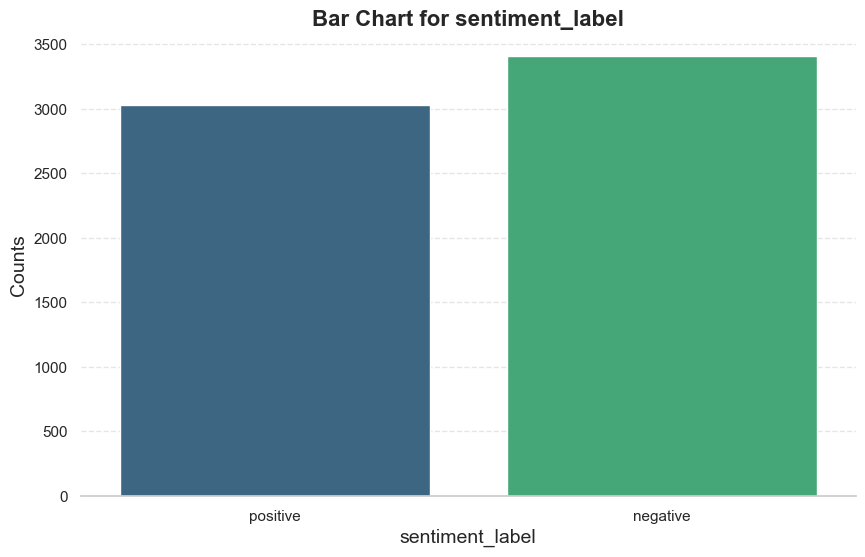

In [46]:
draw_bar_chart(df, 'sentiment_label')

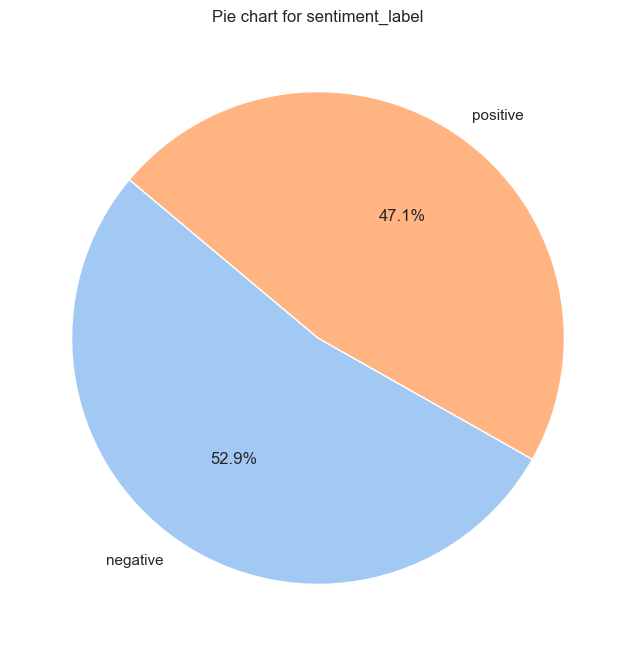

In [47]:
draw_pie_chart(df, 'sentiment_label')

In [35]:
# Lọc dữ liệu với sentiment = 1
df_sentiment_1 = df[df['sentiment'] == 1]
count_words1 = df_sentiment_1["cleaned_content"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
count_words1 = pd.Series(" ".join(count_words1).split()).value_counts()
print(count_words1)

phim      709
không     214
thích     180
được      167
cũng      146
         ... 
junnie      1
leader      1
phjm        1
ova3        1
giường      1
Name: count, Length: 1965, dtype: int64


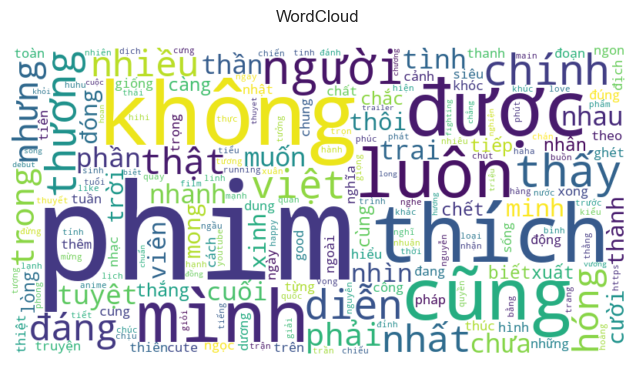

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=count_words1)
fig, ax = plt.subplots(figsize=(14, 4))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("WordCloud\n")
plt.show()

In [37]:
# Lọc dữ liệu với sentiment = 0
df_sentiment_0 = df[df['sentiment'] == 0]
count_words0 = df_sentiment_0["cleaned_content"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
count_words0 = pd.Series(" ".join(count_words0).split()).value_counts()
print(count_words0)

không     598
phim      526
được      228
thấy      195
cũng      137
         ... 
khoobg      1
nhug        1
phuog       1
hazzzz      1
tuân        1
Name: count, Length: 2013, dtype: int64


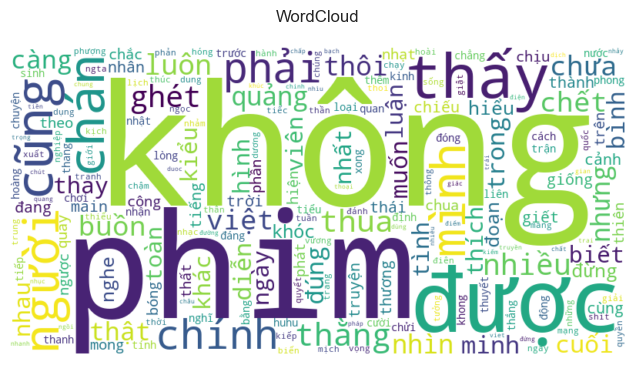

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=count_words0)
fig, ax = plt.subplots(figsize=(14, 4))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("WordCloud\n")
plt.show()